# 1. Background

Predicting avocado prices is essential for stakeholders in the industry, helping farmers plan harvests, distributors optimize supply chains, and retailers make informed pricing decisions. It enables efficient operations and enhances the economic efficiency of the avocado supply chain.  
Leveraging machine learning for predicting avocado prices is crucial in gaining data-driven insights. Traditional methods may struggle to capture the complex interplay of factors affecting avocado prices. Machine learning models excel at handling large datasets and identifying intricate patterns. By employing it, stakeholders can enhance the accuracy of price predictions, allowing for more informed and strategic decision-making. This technology-driven approach not only improves operational efficiency but also helps mitigate risks and uncertainties in the avocado market, contributing to a more resilient and adaptive industry.

# 2. Import Libraries

In [42]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Save model
import joblib
import json

# Bypass so that the warning has no effect
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [43]:
df = pd.read_csv('data.csv')

In [44]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Displaying the first 5 data.

In [45]:
df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Displaying the last 5 data.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


This dataset contains 18249 rows and 14 columns, and there are no missing values. However, there is one column with an inappropriate data type, namely the "Date" column.

In [47]:
# Delete the column Unnamed: 0
df.drop('Unnamed: 0', axis=1 , inplace=True)

Deleting the column Unnamed: 0 as it only serves as an index representation.

In [48]:
# Changing the data type of the Date column
df['Date']=pd.to_datetime(df['Date'])

hanging the data type in the Date column.

# 4. Exploratory Data Analysis (EDA)

## Check Numeric and Non-Numeric Columns

In [49]:
# Check Categorical Columns
cat_cols = list(df.select_dtypes(include='object'))
cat_cols

['type', 'region']

There are 2 types of categorical columns, namely type and region.

In [50]:
# Check Numerical Columns.
num_cols = df.columns[df.dtypes != 'object'].tolist()
num_cols

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

These are the columns that have numerical data types.

In [51]:
# Checking for Data Duplicates
df.duplicated().sum()

0

There are no duplicated rows.

In [52]:
# Checking for missing values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing values in all columns.

## Statistical Analysis

### Categorical Descriptive

In [53]:
df[cat_cols].describe()

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


+ There are 2 types of avocados with conventional type being the most frequent.
+ There are 54 different regions, with 'Albany' as the region with the most entries, although it represents only a small part of the overall data.

### Numerical Descriptive

In [54]:
numerical_cols = [
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

df[numerical_cols].describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


From the table above, the average price of avocados is $1.41. The average sales volume is around 850,644. The table above also provides information about the distribution of sales based on the type and size of avocado packaging. Most of the data comes from around the year 2016.

## Visual Analysis

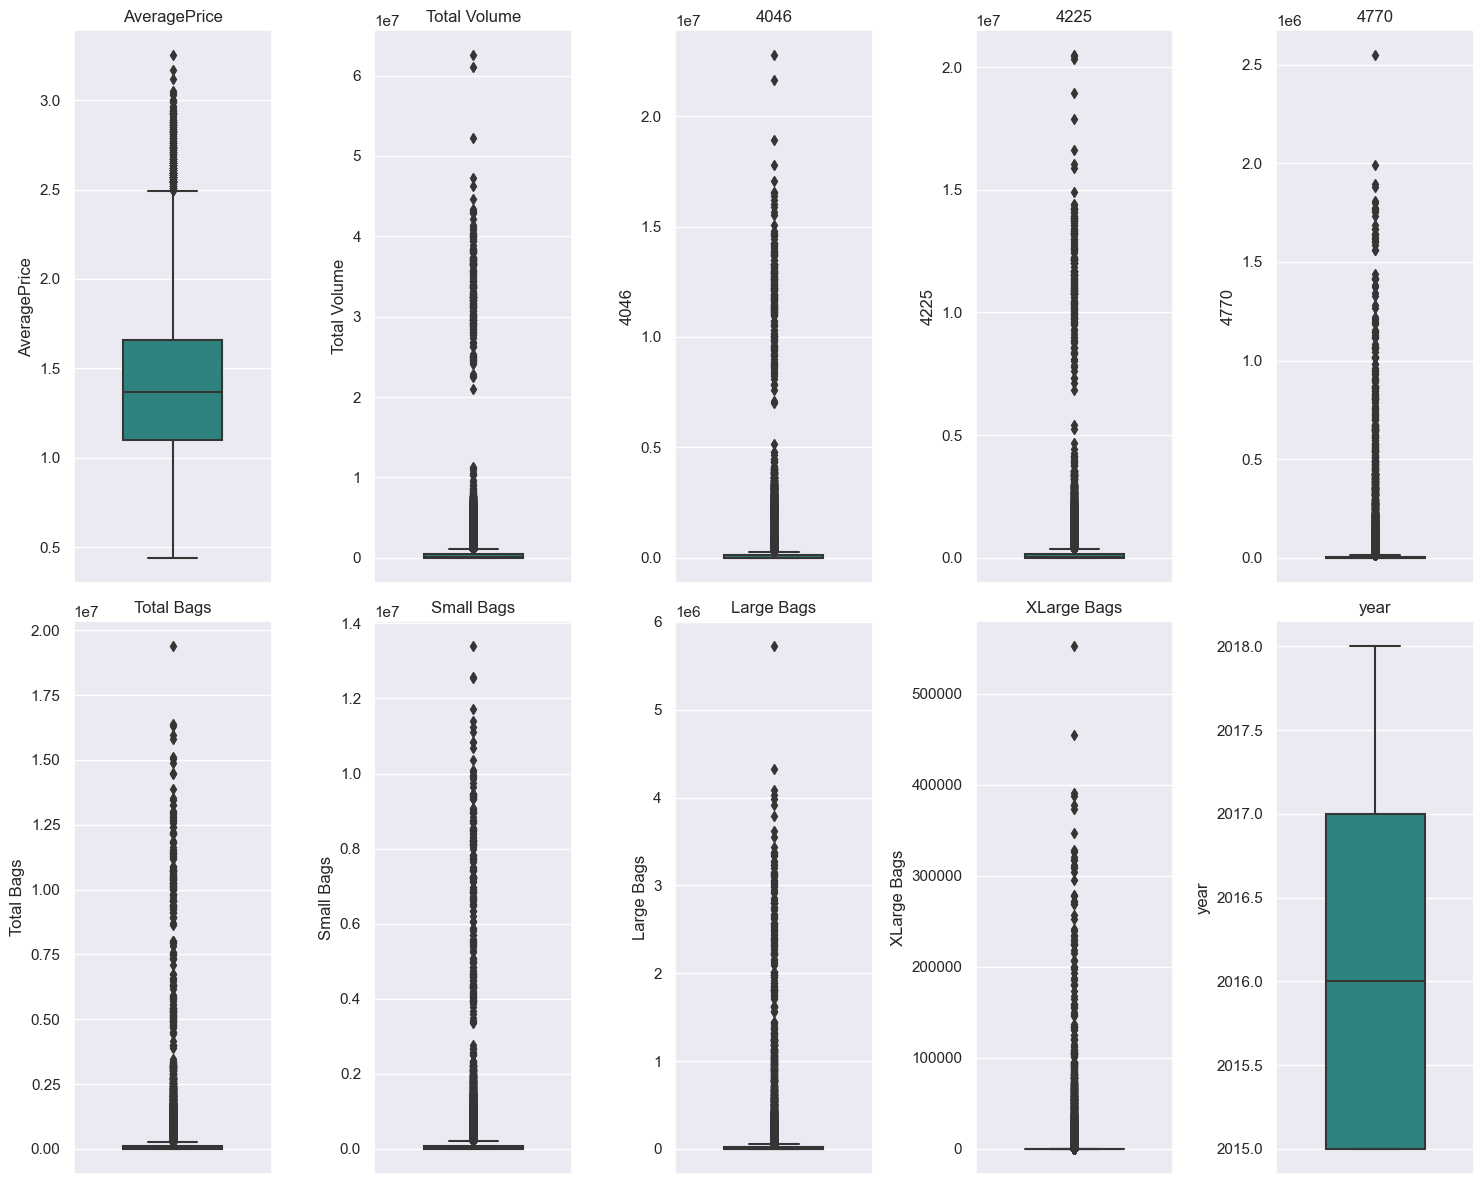

In [17]:
# Creating a style for the plot
sns.set(style="darkgrid")

# Defining the number of rows and columns to display subplots
num_rows = 2
num_cols = 5

# Creating figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12)) 

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterating through all numeric_cols and creating box plots for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], width=0.5, palette="viridis")  
    axes[i].set_title(col)
    axes[i].set_ylabel(col)

# Setting the layout
plt.tight_layout()

# Displaying plots
plt.show()

It can be seen that almost all columns have outliers, but these outliers will not be handled as they may represent the true data variance.

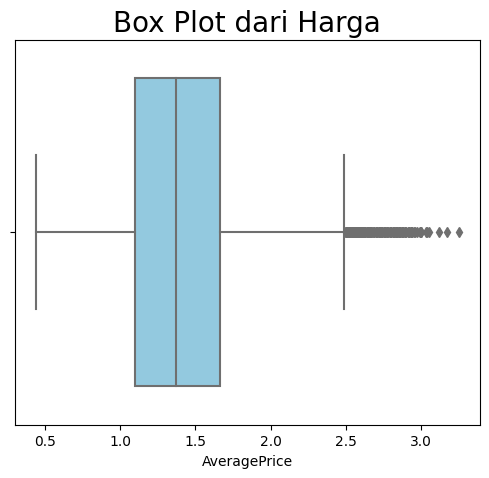

In [7]:
# Creating a boxplot for the column AveragePrice
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['AveragePrice'], color='skyblue')
plt.title("Box Plot dari Harga", fontsize=20)
plt.show()

It can be seen from the above figure that the AveragePrice column has outlier.

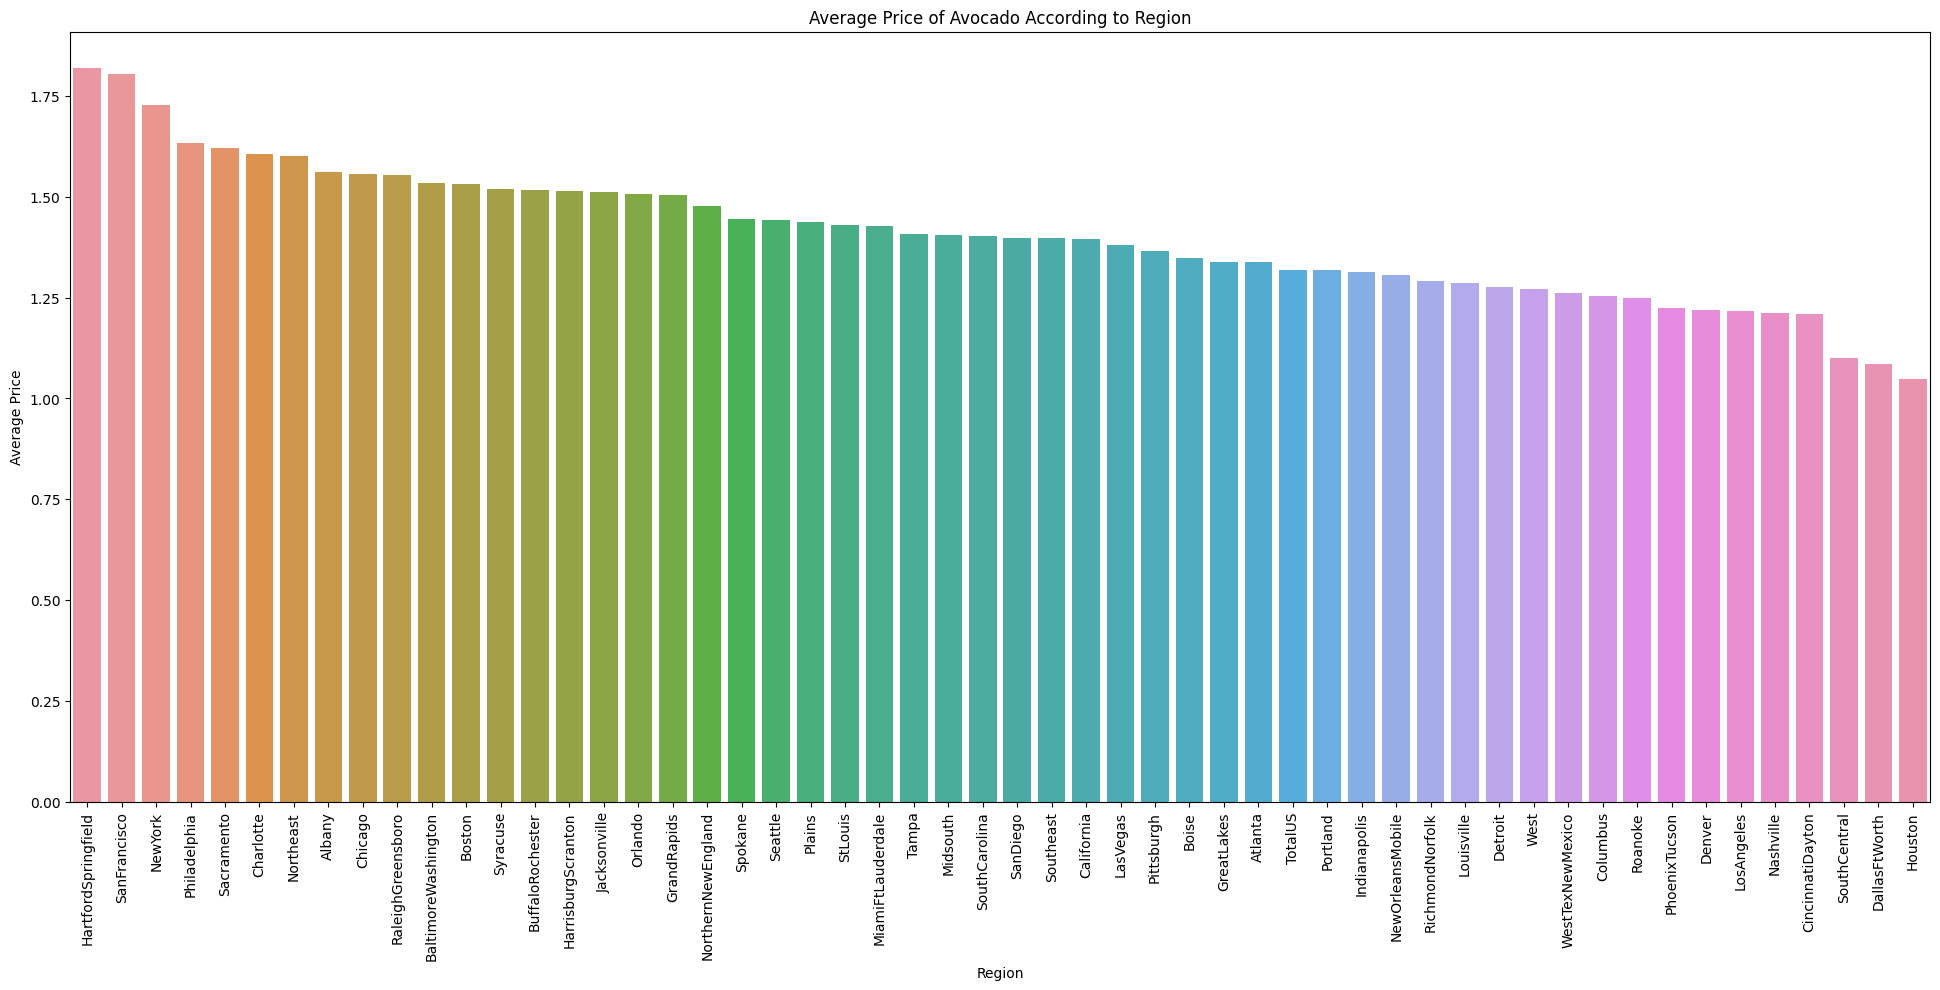

In [10]:
# Creating a bar plot of the average price based on Region
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')
plt.show()

From the above figure, it can be seen that HartfordSpringfield has the highest average avocado selling price, while Houston has the lowest.

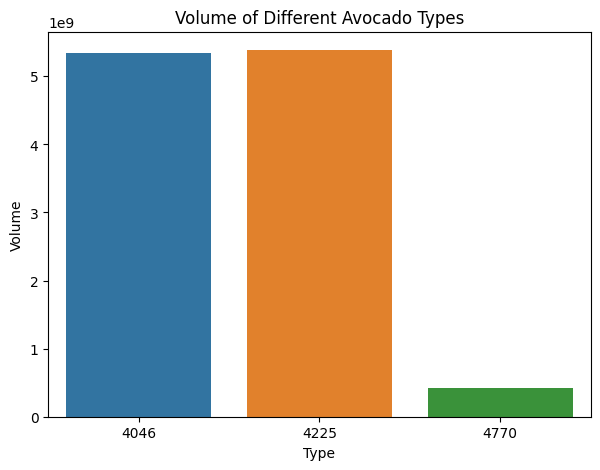

In [14]:
# Bar plot for the volume of avocado types
plt.figure(figsize=(7, 5))
sns.barplot(data=df[['4046', '4225', '4770']].sum().reset_index(), x='index', y=0)
plt.xlabel('Type')
plt.ylabel('Volume')
plt.title('Volume of Different Avocado Types')
plt.show()

From the above plot, it can be seen that avocados with type 4770 have the lowest sales volume.

## Data Preprocessing

### Missing Value Handling

This dataset does not have missing values, so there is no need for missing value handling.

In [55]:
# Extracting the month data from the Date column
df['Month'] = df['Date'].apply(lambda d: d.month)

In [56]:
# Extracting the date data from the Date column
df['Day'] = df['Date'].apply(lambda d: d.day)

In [57]:
# Deleting the Date column
df.drop('Date', axis=1 , inplace=True)

Deleting the Date column because the dataset already has columns for Day, Month, and Year.

In [58]:
df.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# 5. Feature Engineering

## Split Data

In [59]:
# Splitting the data into X (features) and y (target)
X = df.drop('AveragePrice', axis = 1)
y = df['AveragePrice']

## Split into Train-Test

In [60]:
# Splitting into Train-Test datasets
X_train, X_test, y_train, y_test,= train_test_split(X,y, test_size = 0.2,
                                                    random_state = 42)

In [61]:
# Columns of numerical type
numeric_cols = [
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'Month',
 'Day']

In [62]:
X_train[numeric_cols].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
16391,5376.58,147.41,871.40,0.00,4357.77,4351.10,6.67,0.0,2017,11,12
4990,578610.94,155537.61,153030.46,21523.37,248519.50,144796.06,103723.44,0.0,2016,1,10
13653,6470.08,2026.07,2529.20,0.00,1914.81,1848.75,66.06,0.0,2016,11,27
2074,145648.40,78195.76,38763.75,134.25,28554.64,25981.67,2572.97,0.0,2015,2,8
12377,40535.05,162.25,38677.24,0.00,1695.56,1695.56,0.00,0.0,2016,6,12


In [63]:
# Function to calculate skewness
def check_skewness(df, columns):
    skewed_columns = []
    normal_columns = []

    # Calculating skewness for each column
    for col in columns:
        s = skew(X_train[col].dropna())  # ignoring NaN when calculating skewness

        if s < -0.5 or s > 0.5:
            skewed_columns.append((col, s))
        else:
            normal_columns.append((col, s))

    # Displaying the results
    print("Skewed Distribution:")
    for col, s in skewed_columns:
        print(f"{col}: Skewness = {s:.2f}")

    print("\nNormal Distribution:")
    for col, s in normal_columns:
        print(f"{col}: Skewness = {s:.2f}")

    return skewed_columns, normal_columns

skewed_columns, normal_columns = check_skewness(X_train, numeric_cols)

Skewed Distribution:
Total Volume: Skewness = 8.82
4046: Skewness = 8.39
4225: Skewness = 8.81
4770: Skewness = 10.15
Total Bags: Skewness = 9.55
Small Bags: Skewness = 9.34
Large Bags: Skewness = 9.56
XLarge Bags: Skewness = 13.19

Normal Distribution:
year: Skewness = 0.22
Month: Skewness = 0.10
Day: Skewness = 0.02


It can be seen that almost all columns are skewed, with only 3 columns having a normal distribution.

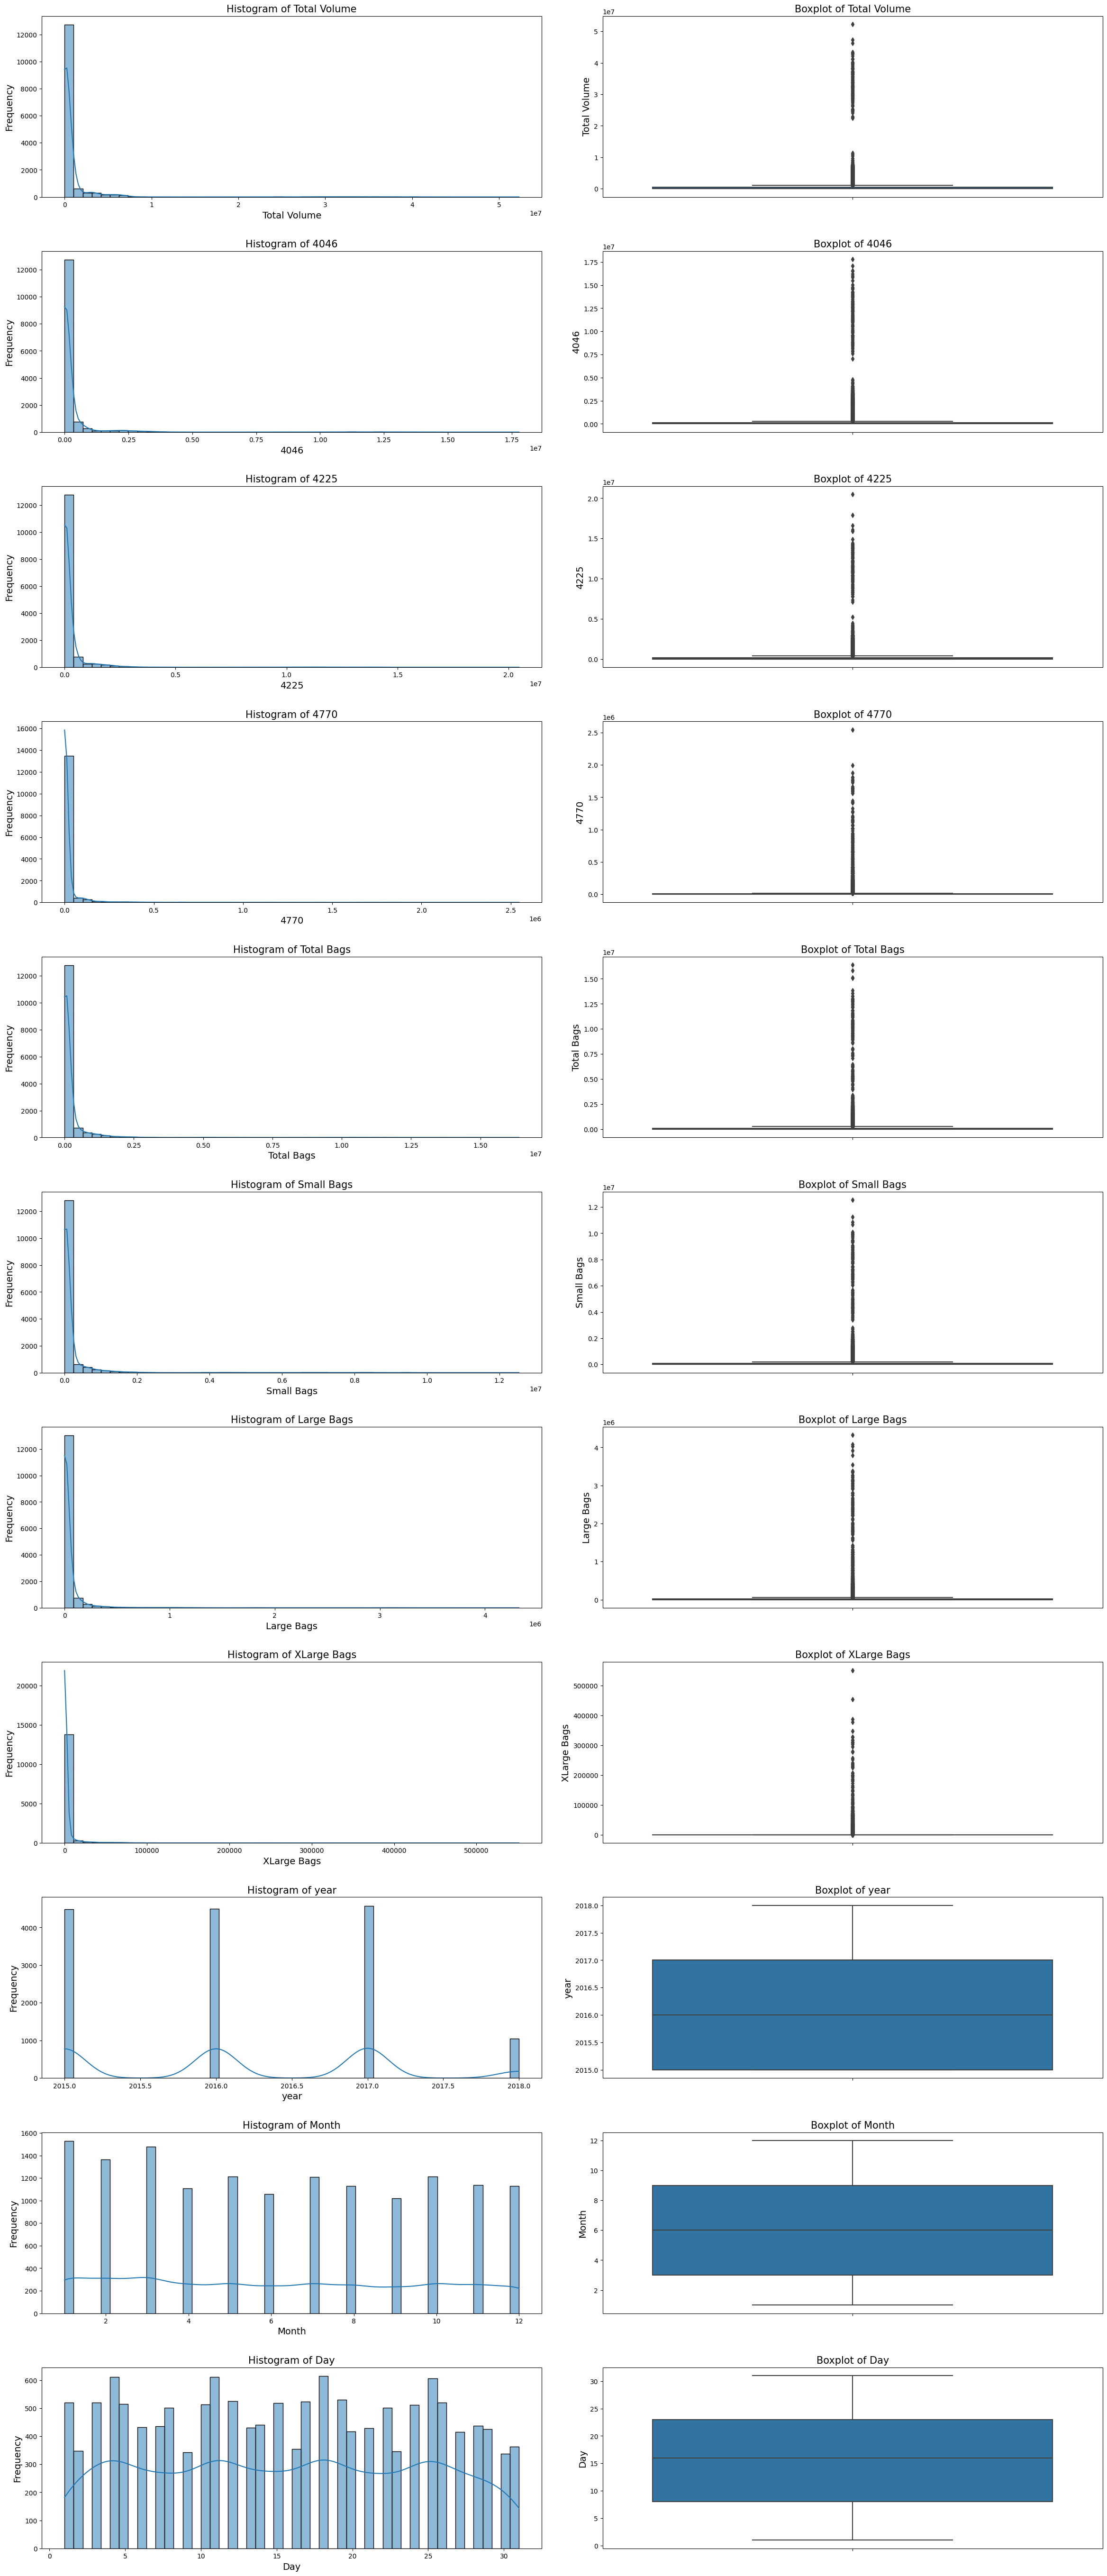

In [66]:
# Function to display histogram and boxplot for each numeric column in the dataframe.

def plot_histogram_boxplot(df):

    # Adjusting the size of the visualization
    plt.figure(figsize=(24, 5 * len(numeric_cols)))

    for i, col in enumerate(numeric_cols, 1):
        # Histogram
        plt.subplot(len(numeric_cols), 2, i*2-1)
        sns.histplot(df[col], bins=50, kde=True)
        plt.title(f'Histogram of {col}', fontsize=15)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)

        # Boxplot
        plt.subplot(len(numeric_cols), 2, i*2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}', fontsize=15)
        plt.ylabel(col, fontsize=14)

    plt.tight_layout(pad=3.0)
    plt.show()

plot_histogram_boxplot(X_train)

It can be seen that almost all columns have outliers, but these outliers will not be handled because they may represent the true variation in the data.

## Feature Selection

In [26]:
# Calculating Spearman correlation
spearman_correlations = {}
for col in numeric_cols:
    correlation = y_train.corr(X_train[col], method='spearman')
    spearman_correlations[col] = correlation

# Converting a dictionary to a DataFrame for a neater display.
spearman_df = pd.DataFrame(list(spearman_correlations.items()), columns=['Feature', 'Spearman Correlation'])

print(spearman_df)

         Feature  Spearman Correlation
0   Total Volume             -0.618248
1           4046             -0.601175
2           4225             -0.519729
3           4770             -0.538336
4     Total Bags             -0.602963
5     Small Bags             -0.541883
6     Large Bags             -0.516797
7    XLarge Bags             -0.434577
8           year              0.101434
9          Month              0.148012
10           Day              0.024683


From the results above, it can be seen that features such as Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags have negative Spearman correlation coefficients, meaning that when the values of these features increase, the values of y_train tend to decrease (and vice versa). These features have a relatively strong negative monotonic relationship with y_train.

In [27]:
# Categorical type columns
categorical_cols = ['type', 'region']

In [28]:
# Separate the data based on type
group1 = y_train[X_train['type'] == X_train['type'].unique()[0]]
group2 = y_train[X_train['type'] == X_train['type'].unique()[1]]

# Conduct a t-test
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")


T-Statistic: 95.2905803937397
P-Value: 0.0


Based on the t-test, the 'type' column has a strong correlation with 'AveragePrice' because it has a p-value smaller than alpha (0.05).

In [29]:
# Selected Features
selected_features = ['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags', 'type']

In [30]:
# Drop features that are not used for the model
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [31]:
len_X_train_selected = len(X_train_selected)
len_y_train = len(y_train)

print("Length of X_train_selected:", len_X_train_selected)
print("Length of y_train:", len_y_train)

Length of X_train_selected: 14599
Length of y_train: 14599


In [32]:
X_train_selected.head(5)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
16391,5376.58,147.41,871.40,0.00,4357.77,4351.10,6.67,0.0,organic
4990,578610.94,155537.61,153030.46,21523.37,248519.50,144796.06,103723.44,0.0,conventional
13653,6470.08,2026.07,2529.20,0.00,1914.81,1848.75,66.06,0.0,organic
2074,145648.40,78195.76,38763.75,134.25,28554.64,25981.67,2572.97,0.0,conventional
12377,40535.05,162.25,38677.24,0.00,1695.56,1695.56,0.00,0.0,organic


In [33]:
num_cols_selected = ['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

cat_cols_selected = ['type']

## Encoding

In [34]:
# Categorical Features Encoding
cat_ohe = Pipeline([('encoding', OneHotEncoder())])

Adding an encoding step using OneHotEncoder into the pipeline.

## Scaling

In [35]:
# Numerical Features Scaling
num_scale = Pipeline([('scaling', MinMaxScaler())])

Adding a scaling step using MinMaxScaler into the pipeline, MinMaxScaler is chosen because it does not alter the data distribution.

In [36]:
# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('scale', num_scale, num_cols_selected),
    ('encode', cat_ohe, cat_cols_selected)
])

At this stage, the ColumnTransformer will perform: 
+ scaling on the columns in num_cols_selected using the transformer defined in num_scale.
+ one-hot encoding on the columns in cat_cols_selected using the cat_ohe pipeline.

# 6. Model Definition

In [37]:
# KNN Pipeline
knn_pipe = Pipeline([('preprocessing', preprocess), ('knn', KNeighborsRegressor())])

# SVM Pipeline
svm_pipe = Pipeline([('preprocessing', preprocess), ('svm', SVR())])

# Decision Tree Pipeline
dt_pipe = Pipeline([('preprocessing', preprocess), ('dt', DecisionTreeRegressor())])

# Random Forest Pipeline
rf_pipe = Pipeline([('preprocessing', preprocess), ('rf', RandomForestRegressor())])

# AdaBoost Pipeline
ada_pipe = Pipeline([('preprocessing', preprocess), ('ada', AdaBoostRegressor())])

Using regression algorithms because it will predict prices where prices are continuous values and trying various models to see which one performs best.

# 7. Model Training

In [39]:
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Total Volume', '4046',
                                                   '4225', '4770', 'Total Bags',
                                                   'Small Bags', 'Large Bags',
                                                   'XLarge Bags']),
                                                 ('encode',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['type'])])),
                ('knn', KNeighborsRegressor())])

In [40]:
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Total Volume', '4046',
                                                   '4225', '4770', 'Total Bags',
                                                   'Small Bags', 'Large Bags',
                                                   'XLarge Bags']),
                                                 ('encode',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['type'])])),
                ('svm', SVR())])

In [41]:
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Total Volume', '4046',
                                                   '4225', '4770', 'Total Bags',
                                                   'Small Bags', 'Large Bags',
                                                   'XLarge Bags']),
                                                 ('encode',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['type'])])),
                ('dt', DecisionTreeRegressor())])

In [42]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Total Volume', '4046',
                                                   '4225', '4770', 'Total Bags',
                                                   'Small Bags', 'Large Bags',
                                                   'XLarge Bags']),
                                                 ('encode',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['type'])])),
                ('rf', RandomForestRegressor())])

In [43]:
ada_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Total Volume', '4046',
                                                   '4225', '4770', 'Total Bags',
                                                   'Small Bags', 'Large Bags',
                                                   'XLarge Bags']),
                                                 ('encode',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['type'])])),
                ('ada', AdaBoostRegressor())])

# 8. Model Evaluation

## Cross Validation

In [73]:
scores_knn = cross_val_score(knn_pipe, X_train, y_train, cv=5, scoring='r2')
scores_svm = cross_val_score(svm_pipe, X_train, y_train, cv=5, scoring='r2')
scores_dt = cross_val_score(dt_pipe, X_train, y_train, cv=5, scoring='r2')
scores_rf = cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring='r2')
scores_ada = cross_val_score(ada_pipe, X_train, y_train, cv=5, scoring='r2')

Performing cross-validation to prevent overfitting and provide an estimate of the model's performance on unseen data. R2 score is used as a metric that measures how well the variation in the dependent variable (in this case, avocado prices) is explained by the independent variables in the model.

In [74]:
print('----KNN----')
print(f'KNN Mean : {scores_knn.mean()}')
print(f'KNN Std : {scores_knn.std()}')
print('')
print('----SVM----')
print(f'SVM Mean : {scores_svm.mean()}')
print(f'SVM Std : {scores_svm.std()}')
print('')
print('----Decision Tree----')
print(f'Decision Tree Mean : {scores_dt.mean()}')
print(f'Decision Tree Std : {scores_dt.std()}')
print('')
print('----Random Forest----')
print(f'Random Forest Mean : {scores_rf.mean()}')
print(f'Random Forest Std : {scores_rf.std()}')
print('')
print('----AdaBoost----')
print(f'AdaBoost Mean : {scores_ada.mean()}')
print(f'AdaBoost Std : {scores_ada.std()}')

----KNN----
KNN Mean : 0.6843218172022609
KNN Std : 0.017692746934263787

----SVM----
SVM Mean : 0.419257847814362
SVM Std : 0.017049924632056988

----Decision Tree----
Decision Tree Mean : 0.5234619995964344
Decision Tree Std : 0.029666249948406206

----Random Forest----
Random Forest Mean : 0.7611890377406224
Random Forest Std : 0.01206571570186346

----AdaBoost----
AdaBoost Mean : 0.43081012594507717
AdaBoost Std : 0.011674372776560683


From the results above it can be concluded that:

+ Random Forest performed best in explaining variations in avocado prices, with an R2 score of around 76.12%.
+ The KNN model also provides quite good performance with an R2 score of around 68.43%.
+ Meanwhile, SVM, Decision Tree, and AdaBoost models have lower performance compared to Random Forest and KNN in the context of this dataset.

Therefore, the model chosen is random forest because it has the highest R2 score.

In [104]:
# Model Evaluation Using MAE and R2 before Hyperparameter Tuning

print('Random Forest')
print('')
print('Train-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_train, rf_pipe.predict(X_train)))
print(f'Train-Set R2 Score: {r2_score(y_train, rf_pipe.predict(X_train))}')
print('')
print('Test-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_test, rf_pipe.predict(X_test)))
print(f'Test-Set R2 Score: {r2_score(y_test, rf_pipe.predict(X_test))}')

Random Forest

Train-Set Mean Absolute Error (MAE):  0.049237509418453326
Train-Set R2 Score: 0.9681168444760839

Test-Set Mean Absolute Error (MAE):  0.13684747945205478
Test-Set R2 Score: 0.7655819527524784


Random Forest on Train-Set:

The MAE value obtained is 0.0492, indicating that the average model prediction error on avocado prices is around 0.0492 (in dollars). For example, if the predicted price is 1.4 then the actual price is 1.3508. Additionally, Random Forest explains about 96.81% of the variation in targets in the training data.

Random Forest on Test-Set:

The MAE value obtained is 0.0492, indicating that the average model prediction error on avocado prices is around 0.137 (in dollars). For example, if the predicted price is 1.5 then the actual price is 1.363. Random Forest explains about 76.56% of the within-target variation in the test data.

In [44]:
# Hyperparameter Tuning : Grid Search
n_estimators = [10]           
max_depth = [None, 5]         
min_samples_split = [2]       
min_samples_leaf = [1]        

grid_search_params = {
    'rf__n_estimators': n_estimators,
    'rf__max_depth': max_depth,
    'rf__min_samples_split': min_samples_split,
    'rf__min_samples_leaf': min_samples_leaf
}

# Initialize GridSearchCV with the pipeline
rf_gridsearch = GridSearchCV(
    estimator=rf_pipe,
    param_grid=grid_search_params,
    cv=3,
    n_jobs=-1
)

# Fit the model
rf_gridsearch.fit(X_train, y_train)

# Print best parameters
print(rf_gridsearch.best_params_)

{'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 10}


In [107]:
# Model Evaluation Using MAE, MSE, RMSE, and R2 after HyperParameter Tuning
print('Random Forest Model')
print('')

# Train set evaluation
y_train_pred = rf_gridsearch.best_estimator_.predict(X_train)
print('Train-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_train, y_train_pred))
print('Train-Set Mean Squared Error (MSE): ', mean_squared_error(y_train, y_train_pred))
print('Train-Set Root Mean Squared Error (RMSE): ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(f'Train-Set R2 Score: {r2_score(y_train, y_train_pred)}')
print('')

# Test set evaluation
y_test_pred = rf_gridsearch.best_estimator_.predict(X_test)
print('Test-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_test_pred))
print('Test-Set Mean Squared Error (MSE): ', mean_squared_error(y_test, y_test_pred))
print('Test-Set Root Mean Squared Error (RMSE): ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(f'Test-Set R2 Score: {r2_score(y_test, y_test_pred)}')



Random Forest Model

Train-Set Mean Absolute Error (MAE):  0.05521337077882047
Train-Set Mean Squared Error (MSE):  0.007140838002602917
Train-Set Root Mean Squared Error (RMSE):  0.08450347923371508
Train-Set R2 Score: 0.9560566258169261

Test-Set Mean Absolute Error (MAE):  0.14369013698630137
Test-Set Mean Squared Error (MSE):  0.04139505123287671
Test-Set Root Mean Squared Error (RMSE):  0.20345773819856722
Test-Set R2 Score: 0.7423583281979329


Model Performance on Train-Set

+ The model has an average error rate (MAE) of 0.0552. This means that on average the model predictions deviate by about 0.0552 from the actual value. The MSE value obtained is 0.0071 and RMSE is 0.0845. RMSE places more emphasis on large errors compared to MAE.

+ The coefficient of determination (R2) is 0.9561, meaning that around 95.61% of the variation in the training data is explained by the model. This shows that the model fits the training data very well.

+ After hyperparameter tuning, the MAE on the training data increases slightly from 0.0492 to 0.0552. This shows that the model is slightly less accurate in predicting the training data after tuning. Apart from that, R2 also decreased from 0.9681 to 0.9561, which means that the model after tuning is slightly less fit to the training data than before tuning.


Model Performance on Test-Set Data

+ The model has an MAE of 0.1437 on the test data, which is greater than the training data. This suggests the model may be slightly less accurate on data it has not seen before.
+ RMSE for the test data is 0.2035, also greater than the training data, indicating that there are more significant prediction errors in some cases in the test data.
+ R2 on the test data is 0.7424, which means the model explains about 74.24% of the variation in the test data. Even though it is lower than the training data, it still shows quite good performance.

+ MAE after tuning also increased from 0.1368 to 0.1437. This shows that the model after tuning is slightly less accurate in predicting data that has not been seen before. In addition, the R2 score decreased from 0.7656 to 0.7424, indicating that the model after tuning was slightly less able to explain the variations in the test data.

# 9. Model Saving

In [46]:
# Save the model to pkl format

with open('model_rf.pkl', 'wb') as file_1:
  joblib.dump(rf_gridsearch.best_estimator_, file_1)

In [47]:
with open('model_selected_features.txt', 'w') as file_2:
  json.dump(selected_features, file_2)

# 10. Model Inference

## Data Loading

In [66]:
# Load file

with open('model_rf.pkl', 'rb') as file_1:
  model_scaling = joblib.load(file_1)

with open('model_selected_features.txt', 'r') as file_2:
  features = json.load(file_2)

## Create a new dataframe


In [57]:
# Create a new dataframe
data_inf = pd.DataFrame (
    {
        'Unnamed: 0': [1, 3, 4, 5],
        'Date': ['2015-12-03', '2015-03-01', '2015-01-25', '2015-01-04'],
        'Total Volume': [101470.91, 109857.47, 120427.91, 49585.46],
        '4046': [509.94, 648.75, 1042.1, 672.25],
        '4225': [90062.62, 94362.67, 67933.79, 68666.01],
        '4770': [93.76, 89.5, 141.8, 99.67],
        'Total Bags':[47046.48, 48628.65, 65398.38, 56751.46],
        'Small Bags': [45068.25, 45820.45, 42126.47, 45114.22],
        'Large Bags':[45134.15, 44584.77, 25125.65, 52442.25],
        'XLarge Bags': [46.54, 71.03, 5.45, 29.91],
        'type': ['conventional', 'organic', 'conventional', 'organic'],
        'year': [2015, 2015, 2015, 2015],
        'region': ['Tampa', 'Albany', 'Seattle', 'San Fransisco']
    }
)


In [58]:
# Delete column Unnamed: 0
data_inf.drop('Unnamed: 0', axis=1 , inplace=True)

In [61]:
# Change the data type in the Date column
data_inf['Date']=pd.to_datetime(data_inf['Date'])

In [62]:
# Retrieves month data from the Date column
data_inf['Month'] = data_inf['Date'].apply(lambda d: d.month)

In [63]:
# Retrieves date data from the Date column
data_inf['Day'] = data_inf['Date'].apply(lambda d: d.day)

In [64]:
# Delete the Date column
data_inf.drop('Date', axis=1 , inplace=True)

In [65]:
data_inf

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,101470.91,509.94,90062.62,93.76,47046.48,45068.25,45134.15,46.54,conventional,2015,Tampa,12,3
1,109857.47,648.75,94362.67,89.50,48628.65,45820.45,44584.77,71.03,organic,2015,Albany,3,1
2,120427.91,1042.10,67933.79,141.80,65398.38,42126.47,25125.65,5.45,conventional,2015,Seattle,1,25
3,49585.46,672.25,68666.01,99.67,56751.46,45114.22,52442.25,29.91,organic,2015,San Fransisco,1,4


In [67]:
data_inf_select = data_inf[features]
data_inf_select

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,101470.91,509.94,90062.62,93.76,47046.48,45068.25,45134.15,46.54,conventional
1,109857.47,648.75,94362.67,89.50,48628.65,45820.45,44584.77,71.03,organic
2,120427.91,1042.10,67933.79,141.80,65398.38,42126.47,25125.65,5.45,conventional
3,49585.46,672.25,68666.01,99.67,56751.46,45114.22,52442.25,29.91,organic


In [70]:
# Make predictions on Inference Data
data_inf['AveragePrice'] = rf_gridsearch.best_estimator_.predict(data_inf_select)
data_inf

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,AveragePrice
0,101470.91,509.94,90062.62,93.76,47046.48,45068.25,45134.15,46.54,conventional,2015,Tampa,12,3,1.212
1,109857.47,648.75,94362.67,89.50,48628.65,45820.45,44584.77,71.03,organic,2015,Albany,3,1,1.880
2,120427.91,1042.10,67933.79,141.80,65398.38,42126.47,25125.65,5.45,conventional,2015,Seattle,1,25,1.137
3,49585.46,672.25,68666.01,99.67,56751.46,45114.22,52442.25,29.91,organic,2015,San Fransisco,1,4,1.704


# 11. Conclusion

The best model is Random Forest because it provides the best performance in explaining variations in avocado prices with an average R2 score of around 76.12% compared to other models.

Before Hyperparameter Tuning:


+ The Random Forest model performs very well on training data, but its performance decreases slightly when applied to test data. However, the performance on test data is still quite good with an R2 Score of around 76.56%.
There is a difference between model performance on training data and test data, which could indicate overfitting, although this is not necessarily the case because performance on test data is still relatively high.


After Hyperparameter Tuning:


+ The Random Forest model shows excellent performance on the training data, explaining more than 95% of the variation. However, when applied to test data, the performance decreases slightly but is still quite good at explaining about 74% of the variation. There are indications of mild overfitting, because the model is slightly more accurate on the training data than the test data, but the difference is not very significant.


Based on the results obtained before and after hyperparameter tuning, it seems that tuning does not improve model performance in this case. Actually, the performance of the model decreased slightly after tuning. This may indicate that the original model is already optimal enough or that the tuning performed has not achieved the best combination of hyperparameters.



Model Advantages:
+ High Accuracy (Based on R2 Score): The model has a high R2 Score, especially on training data. This shows that the model can explain variations in avocado prices well, which is important for understanding the factors that influence prices.

+ Application of the Model in Different Regions: Using a model like Random Forest allows us to predict avocado prices in various regions, allowing stakeholders to make pricing decisions based on specific geographic regions.

+ Important for Business Planning: By predicting avocado prices, stakeholders can better plan sales, promotion and inventory strategies, optimizing profits.

Model Weaknesses:
+ Overfitting: There is a significant difference between the R2 scores from the training data and the test data. This could indicate that the model may be overfitting to the training data and may not perform well on new data or in different market conditions.

+ Sensitivity to Outliers: Models like Random Forest can be sensitive to outliers which can affect the accuracy of price predictions.

+ Reliance On Historical Data: Avocado price predictions are highly dependent on historical data. Sudden changes in the market, for example due to weather factors, natural disasters, or policy changes, may not be well reflected in model predictions.

To improve the performance and results of this model you can consider the following steps:

+ Feature Engineering: Creating new features that may be relevant or a combination of existing features.

+ Outlier Handling: Use techniques such as IQR (Interquartile Range) or Z-Score to identify and address outliers.

+ Data Transformation: For data that has skewness or non-normal distribution, you can apply transformations such as log transform.

In a business like the avocado business, price is one of the key factors that influences demand and supply. Predicting prices correctly can help manufacturers and retailers in setting prices, planning inventory, and maximizing profits. However, it must be remembered that this prediction model is just one tool in the business toolbox. Decisions should be made based on a combination of model predictions, domain knowledge, and business policy. Additionally, it is recommended to always consider prediction error and always test the model with the latest data to ensure its accuracy before making major business decisions based on those predictions.